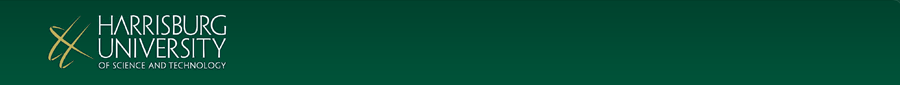
<br>
# CISC 340
# Introduction to Artificial Intelligence
## Lab Booklet #03
## Lab Title: Heurisitic Searching
***
### **Instructors**
### Brian Grey M.S.
### Chad Van Chu M.S.
***

# Objectives
#### Searching problems are central to gaining an understanding of Artificial Intelligence. We will be continuing our work from the last class by implementing two classic algorithms central to the concept of modern AI: Dijkstra’s algorithm and the heuristic-based extension, A*. We will construct an algorithm so that, if fed information in the proper format, our algorithm can find the shortest path between two specified points and, potentially, display the state of the search along the way.

#### After completing this lab, you will be able to:

- __Create and implement a novel design for representing a graph__
- __Understand the differences in theory and application between Dijksta’s search algorithm and A*__
- __Understand the principle of an admissible optimistic heuristic__
- __Design and parameterize robust and necessary output__

# Resources
#### While the lab will explain everything that you need to know, you may want to consult the following sources for additional knowledge:

- [https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [https://en.wikipedia.org/wiki/A*_search_algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm)

# Deliverables
#### For this lab, you will need to submit:

- Jupyter notebook files (.ipynb), named and coded as instructed. 
  - CISC 340 Lab 03 FA19.ipynb

# Instructions & Questions
Dijkstra and A* both work on directed and undirected connected graphs where edge weights are non-negative. Given this we are going to need to construct a graph of this type and store it within our code. We can then pass this graph to the function which runs the search. The call to the function is to take the form:

`searchXxxxx(Graph g, Node start, Node end, bit robust_output)`

Where `Xxxxx` is the name of the algorithm, `Graph g` is the graph being searched, `Node start` is the starting point, `Node end` is the ending point, and `bit robust_output` represents whether the program will display more output while it is running.
When storing your graph, you will need to store each node within the graph and the connections between the nodes. For this lab, we are going to assume that edge weights are determined by Euclidean distance. Therefore, you will also need to store the coordinate of each node.

For your implementation, you will run a search using Dijkstra and A* on the graph given to determine the shortest path for `Node start` to `Node end`. The program will output the shortest path between the two nodes, the length of the path, and the number of nodes visited for each algorithm.

# <u>Part 1: Design</u>

First, you need to determine certain design aspects regarding your solution.

#### 1. Explain, in detail, how you will store your graph and nodes within your code. Be sure to explain how the data will be structured internally.

I will use an adjacency list to store my nodes within the graph. Each node and it's neighbors will be stored. This will be done by using nested dictionaires.


#### 2. Explain, in detail, what additional information you will display when the <i>robust_output</i> flag is set to true. Information may be displayed before the search algorithm starts, during each iteration of searching, or after the search algorithm completes. Be sure to include when your additional data will be displayed.

While robust_output is true, we can display the currently visited list and show each step of each iteration of the algorithm. The information will be displayed while the code is running, during iterations. It will show all information needed to track what is going on in the program and how the program is getting the results it is getting. 

# <u>Part 2: Concept</u>


#### 3. Translate the following maze into your graph storage methodology. You may document this using conceptual representations or code-based representations. Be sure to include “dead end” nodes in your graph.

![Maze](maze.png)

g = {"a": {"b": 4, "c": 4},
"b": {"a": 4}, 
"c": {"a": 4, "d": 3, "e": 7},
"d": {"c": 3},
"e": {"c": 7, "f": 2, "g": 4, "h": 8},
"f": {"e": 2},
"g": {"e": 4},
"h": {"i": 3, "j": 8, "e": 8},
"i": {"h": 3},
"j": {"k": 2, "l": 2, "h": 8}, 
"k": {"m": 1, "n": 2, "j": 2},
"l": {"j": 2},
"m": {"k": 1},
"n": {"k": 2}}

Each key represents the vertex. Each vertex within the key is it's neighbor and the weight represent the distance between the two nodes. 

h = {"a": (0,0), #Start node(x,y)
     "b": (1,1),
     "c": (1,3),
     "d": (3,2),
     "e": (4,3),
     "f": (5,4),
     "g": (6,3),
     "h": (6,1),
     "i": (7,1),
     "j": (8,3),
     "k": (7,4),
     "l": (9,2),
     "m": (6,4),
     "n": (9,4)} #End node
     
This is for the Euclidean distance. This was found by translating the maze into a 9x4 grid. Each coordinate represents the location of the node within said grid. This will be used for the A* algorithm only. Not needed for Dijsktra.

# <u>Part 3: Implementation</u>


#### 4.	Implement your solution for the `searchDijsktra` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [343]:




dict_of_dist = {}
dict_of_unvisited = {v: float("inf") for v in g}
dict_of_parents = {}
list_of_path = []

def searchDijsktra(g, start_node, end_node, robust_output):
    
   


    if start_node == end_node: #Base case
        previous_node = end_node
        while previous_node != None:
            if robust_output == 1:
                print("Previous Nodes:", previous_node)
            list_of_path.append(previous_node) #Add nodes to the path
            previous_node = dict_of_parents.get(previous_node, None) #Gets parents, if it can't, returns none.
        print("The path is:", (list_of_path), "Total Distance from start node to end node:", dict_of_dist[end_node])

        
    else: #If are base case doesn't get hit
        if not dict_of_parents: #First run, set beginning node to 0
            dict_of_dist[start_node] = 0
    
        for n in g[start_node]: #iterate through each neighbor of current node
            if robust_output == 1:#Output
                print("neighbor", n)
            if n in dict_of_unvisited:#If we haven't visited it, visit it
                current_dist = g[start_node][n] + dict_of_dist[start_node] #
                if robust_output == 1:#output
                    print("New distance", current_dist)
                if current_dist < dict_of_unvisited.get(n):#if the current distance obtained is less than the distance stored in unvisited
                    dict_of_unvisited[n] = current_dist#set the new distance
                    dict_of_dist[n] = current_dist
                    dict_of_parents[n] = start_node#Keeps track of the parents.
                    if robust_output == 1:#Output
                        print("list of distances", dict_of_dist)
                        print("list of parents", dict_of_parents)
        del dict_of_unvisited[start_node]
        if robust_output == 1:
            print("unvisited", dict_of_unvisited)
        
        new_node = min(dict_of_unvisited, key=dict_of_unvisited.get)
        if robust_output == 1:
            
            print("newest node:", new_node)
        searchDijsktra(g, new_node, end_node, robust_output)
    
    ####GET RID OF THE VISITED LIST, WE ONLY NEED THE UNVISITED LIST !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                

                
                
                
            
            
g = {"a": {"b": 4, "c": 4},
"b": {"a": 4}, 
"c": {"a": 4, "d": 3, "e": 7},
"d": {"c": 3},
"e": {"c": 7, "f": 2, "g": 4, "h": 8},
"f": {"e": 2},
"g": {"e": 4},
"h": {"i": 3, "j": 8, "e": 8},
"i": {"h": 3},
"j": {"k": 2, "l": 2, "h": 8}, 
"k": {"m": 1, "n": 2, "j": 2},
"l": {"j": 2},
"m": {"k": 1},
"n": {"k": 2}}

searchDijsktra(g, "a", "n", 0) #Change robust output to 1 for output, 0 for just the results

The path is: ['n', 'k', 'j', 'h', 'e', 'c', 'a'] Total Distance from start node to end node: 31



#### 5. Implement your solution for the `searchAStar` function. You may write any helper functions that you wish. Be sure to test this code with the graph you created in Question 4, above, as well as with any other graph examples that you wish to use.

In [342]:
import math #For Square Root


dict_of_dist = {}
unvisited = {v: float("inf") for v in g}
dict_of_parents = {}
list_of_path = []
hueristic = {}


def searchA(g, h, start_node, end_node, robust_output):
    
   #This is mostly the same at the dijkstra implementation EXCEPT the method of calculating the distances are different. Therefore, the traversal should be different as well. But, the result should be the same


    if start_node == end_node: #Base Case, if we reach the end node, stop.
        previous_node = end_node 
        while previous_node != None:
            if robust_output == 1: #Output
                print("Previous Nodes:", previous_node)
            list_of_path.append(previous_node) #Add nodes to the path
            if robust_output == 1:
                print(dict_of_parents)
            previous_node = dict_of_parents.get(previous_node, None) #Gets parents, if it can't, returns none.
        print("The path is:", (list_of_path), "Total Distance from start node to end node in path(Euclidean Distance and Distance between nodes combined):", dict_of_dist[end_node])

        
    else:
        if not dict_of_parents: 
            dict_of_dist[start_node] = 0 
            hueristic[start_node] = 0
    
        for n in g[start_node]:
            if robust_output == 1: #output
                print("neighbor", n)
            if n in unvisited:
                current_dist = dict_of_dist[start_node] + g[start_node][n]
                Euclidean = math.sqrt(abs((h[n][0] - h[end_node][0]))**2 + (abs(h[n][1] - h[end_node][1]))**2) #Euclidean distance between 2 points is calculated by: sqrt(x1-x2)^2 + (y1-y2)^2. This gives us a the 'true'(straight line) distance of the current and the end node. 
                
                if robust_output == 1:
                
                    print("x1",h[n][0])
                    print("x2",h[end_node][0])
                    print("y1",h[n][1])
                    print("y2",h[end_node][1])
            
                    print("Result from Euclidean formula", Euclidean)
                f = current_dist + Euclidean

                #print(f)
                hueristic[n] = f
                #print(hueristic)
                
                if robust_output == 1:
                    print("New distance", f)#Output
                if hueristic[n] < unvisited.get(n):
                    dict_of_dist[n] = hueristic[n]
                    dict_of_parents[n] = start_node
                    if robust_output == 1:
                        print("list of distances", dict_of_dist) #Output
                        print("list of parents", dict_of_parents) #Output
                        
        
        
    
        del unvisited[start_node]
        del hueristic[start_node]
        
            
        
        new_node = min(hueristic, key=hueristic.get)#The new node we select should be the lowest neighbor of the current node.
       
        if robust_output == 1:
            print("The new minimum node", min(hueristic, key=hueristic.get))
            print("unvisited", unvisited) #Output
            print("hueristic:", hueristic)
            print("newest node:", new_node)#Output
        searchA(g, h, new_node, end_node, robust_output)
    
   
                
                
                
                
                
            
            
g = {"a": {"b": 4, "c": 4},
"b": {"a": 4}, 
"c": {"a": 4, "d": 3, "e": 7},
"d": {"c": 3},
"e": {"c": 7, "f": 2, "g": 4, "h": 8},
"f": {"e": 2},
"g": {"e": 4},
"h": {"i": 3, "j": 8, "e": 8},
"i": {"h": 3},
"j": {"k": 2, "l": 2, "h": 8}, 
"k": {"m": 1, "n": 2, "j": 2},
"l": {"j": 2},
"m": {"k": 1},
"n": {"k": 2}}

#H is a dictionary of the coordinates of each point of the map. To further explain, if the maze was made into a 9x4 grid, with point(0,0) being start and point(9,4) being the end node, and each coordinate was evenly distrubited,  then the following coordinates would be the correct positions of each vertex in the maze.
#To clear up any confusion, ask me in class about it. I can better explain it in person and show you how I did it. But I basically just put the maze into a grid, which was in correspondence to the method I used to obtain the distance, and the coordinates represent a spot on that grid.


h = {"a": (0,0), #Start node(x,y)
     "b": (1,1),
     "c": (1,3),
     "d": (3,2),
     "e": (4,3),
     "f": (5,4),
     "g": (6,3),
     "h": (6,1),
     "i": (7,1),
     "j": (8,3),
     "k": (7,4),
     "l": (9,2),
     "m": (6,4),
     "n": (9,4)} #End node
         


searchA(g, h, "a", "n", 0) #change the robust_output to 1 for output, 0 for just the results.


The path is: ['n', 'k', 'j', 'h', 'e', 'c', 'a'] Total Distance from start node to end node in path(Euclidean Distance and Distance between nodes combined): 51.81813151138371



#### 6.	How does the performance of your `searchDijsktra` function compare with the performance of the `searchAStar` function? Explain, in detail, with whatever relevant data you have from your code.

The A star program ran slightly faster than the the dijkstra algorithm. This is shown by the total number of steps taken in each program. In the Dijsktra algorithm, we visited every node in the graph (this is due to how the graph was built, not the algorithm itself). With A*, we visited one less node (m) and in result, it was slighly faster. If we were to use different graphs, than results may be different, but A* should always perform better than Dijsktra. 